In [2]:
pip install kaggle matplotlib seaborn pandas numpy scikit-learn tensorflow


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105797 sha256=3f102bbdd2c83c53122cde89914055d9892b9044a64779f5751174f953612003
  Stored in directory: c:\users\vansh\appdata\local\pip\cache\wheels\46\d2\26\84d0a1acdb9c6baccf7d28cf06962ec80529fe1ad938489983
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install kaggle matplotlib tensorflow

Note: you may need to restart the kernel to use updated packages.


In [12]:
!pip install "numpy<2.0"


In [15]:
!pip install --upgrade pandas matplotlib scipy


C:\Users\vansh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 84s 18ms/step - accuracy: 0.9083 - loss: 0.3304 - val_accuracy: 0.9779 - val_loss: 0.0804
Epoch 2/5
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 82s 18ms/step - accuracy: 0.9807 - loss: 0.0686 - val_accuracy: 0.9836 - val_loss: 0.0604
Epoch 3/5
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 107s 23ms/step - accuracy: 0.9866 - loss: 0.0454 - val_accuracy: 0.9860 - val_loss: 0.0519
Epoch 4/5
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 113s 24ms/step - accuracy: 0.9907 - loss: 0.0310 - val_accuracy: 0.9888 - val_loss: 0.0430
Epoch 5/5
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 118s 25ms/step - accuracy: 0.9932 - loss: 0.0218 - val_accuracy: 0.9885 - val_loss: 0.0452
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9883 - loss: 0.0448
Test Accuracy: 98.85%
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━

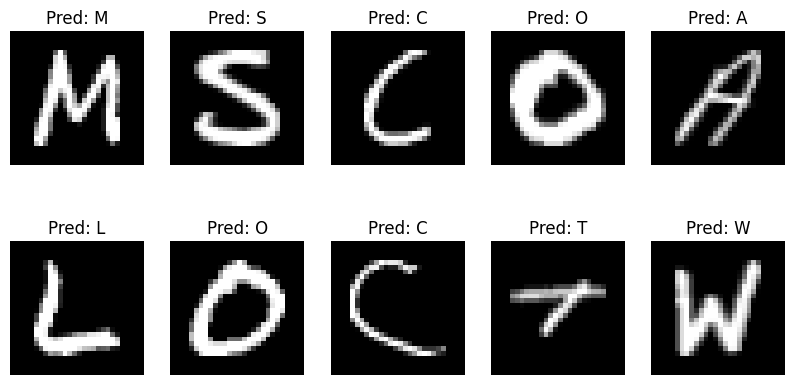

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Step 1: Load dataset directly
data = pd.read_csv(r"C:\Users\vansh\Downloads\archive (5)\A_Z Handwritten Data.csv")
data.columns = ["label"] + [f"pixel{i}" for i in range(1, 785)]

# Step 2: Preprocess data
X = data.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0  # Normalize pixel values
y = data["label"].values
y = to_categorical(y, num_classes=26)  # One-hot encode labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build a simple CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(26, activation='softmax')  # 26 classes for A-Z
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Step 5: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Step 6: Visualize predictions
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    img = X_test[i].reshape(28, 28)
    pred = np.argmax(model.predict(X_test[i].reshape(1, 28, 28, 1)))
    plt.imshow(img, cmap='gray')
    plt.title(f"Pred: {chr(pred + 65)}")
    plt.axis('off')
plt.show()
